In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler


In [2]:
df_all = pd.read_csv('file2_2.csv')



In [3]:
df_all=df_all.drop(columns=['Unnamed: 0'])
df_all.head()

,date,user,text,results,polarity,subjectivity,sentiment
0,2009-06-24,caitlingeiger,camtronsummerswont know untilget new work sche...,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive
1,2009-06-15,mad_vtak,also togood friend congrats man engaged im hap...,"{'polarity': 0.8, 'subjectivity': 1.0, 'sentim...",0.800000,1.000000,Positive
2,2009-05-18,stupid_doll_,yaaaay finally,"{'polarity': 0.0, 'subjectivity': 1.0, 'sentim...",0.000000,1.000000,Neutral
3,2009-06-02,Geeklawyer,manxstef spoke canon take elstree ffs drive lo...,"{'polarity': -0.060714285714285714, 'subjectiv...",-0.060714,0.307143,Negative
4,2009-06-02,DrunkenNyt,simply orange thee best juice ever made,"{'polarity': 0.5, 'subjectivity': 0.3285714285...",0.500000,0.328571,Positive


In [4]:
df_all['date'] = pd.to_datetime(df_all['date'])
tweets_per_day = df_all.groupby(df_all['date'].dt.date)['text'].count()
tweets_per_day = pd.DataFrame(tweets_per_day)
tweets_per_day.head()

,text
date,
2009-04-06,4313
2009-04-07,22298
2009-04-17,3888
2009-04-18,27718
2009-04-19,34888


In [5]:

train = tweets_per_day[tweets_per_day.index < pd.to_datetime("2009-06-01").date()]
test = tweets_per_day[tweets_per_day.index >= pd.to_datetime("2009-06-01").date()]
test

,text
date,
2009-06-01,140452
2009-06-02,81629
2009-06-03,52834
2009-06-04,10009
2009-06-05,74304
2009-06-06,141565
2009-06-07,121726
2009-06-14,10727
2009-06-15,140123


In [6]:
# Scale data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['text']])
test_scaled = scaler.transform(test[['text']])

In [7]:
# Function to convert time series to data sequence for RNN learning
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Specify the length of the sequence (the number of time steps for model learning)
sequence_length = 7

# Create sequences for learning and testing
X_train, y_train = create_sequences(train_scaled, sequence_length)
X_test, y_test = create_sequences(test_scaled, sequence_length)

In [8]:
from tensorflow.keras.layers import Conv1D

# Create and train a model with changed hyperparameters for Conv1D layers
model_conv1d = keras.Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    keras.layers.Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(1)
])

model_conv1d.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')
history_conv1d = model_conv1d.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test, y_test))




Metal device set to: Apple M1
Epoch 1/100


2023-08-05 21:36:35.979927: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 3s 269ms/step - loss: 0.1270 - val_loss: 0.1417
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.1300 - val_loss: 0.1364
Epoch 3/100
2/2 [==============================] - 0s 30ms/step - loss: 0.1225 - val_loss: 0.1310
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.1267 - val_loss: 0.1259
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 0.1202 - val_loss: 0.1210
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.1188 - val_loss: 0.1163
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.1150 - val_loss: 0.1117
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 0.1157 - val_loss: 0.1073
Epoch 9/100
2/2 [==============================] - 0s 28ms/step - loss: 0.1153 - val_loss: 0.1031
Epoch 10/100
2/2 [==============================] - 0s 28ms/step - loss: 0.1148 - val_loss: 0.0990
Epoch 11/100
2/2 [============

Epoch 84/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0701 - val_loss: 0.0688
Epoch 85/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0655 - val_loss: 0.0691
Epoch 86/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0703 - val_loss: 0.0694
Epoch 87/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0613 - val_loss: 0.0697
Epoch 88/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0659 - val_loss: 0.0700
Epoch 89/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0712 - val_loss: 0.0703
Epoch 90/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0673 - val_loss: 0.0707
Epoch 91/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0634 - val_loss: 0.0710
Epoch 92/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0683 - val_loss: 0.0714
Epoch 93/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0652 - val_loss: 0.0718
Epoch 94/1

1/1 [==============================] - 0s 55ms/step


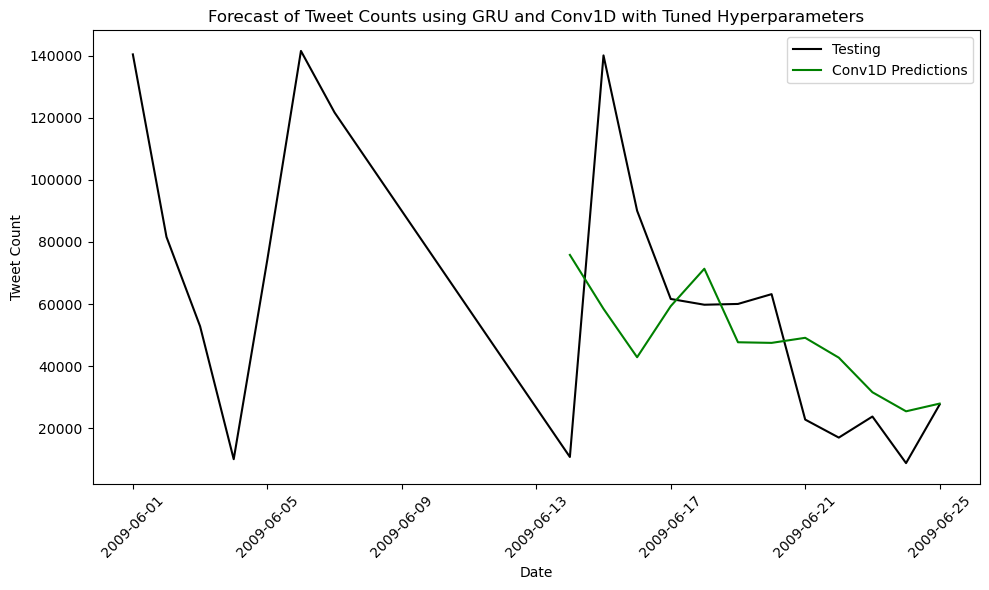

In [9]:
# Make a test sample prediction with updated models

y_pred_conv1d_scaled = model_conv1d.predict(X_test)
y_pred_conv1d = scaler.inverse_transform(y_pred_conv1d_scaled)

# Visualize results of forecasts
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['text'], color='black', label='Testing')

plt.plot(test.index[sequence_length:], y_pred_conv1d, color='green', label='Conv1D Predictions')
plt.ylabel('Tweet Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Forecast of Tweet Counts using GRU and Conv1D with Tuned Hyperparameters')
plt.legend()
plt.tight_layout()
plt.show()

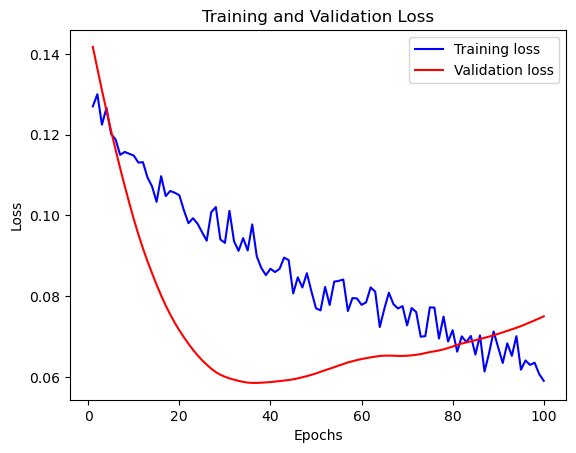

In [10]:
# Getting the learning history
loss = history_conv1d.history['loss']
val_loss = history_conv1d.history['val_loss']
epochs = range(1, len(loss) + 1)

# Visualize training results
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

кривые loss и val_loss идут близко друг к другу и уменьшаются, это может указывать на хорошую обобщающую способность модели. 

Text(0.5, 1.0, 'Tweet prediction(Conv1D)')

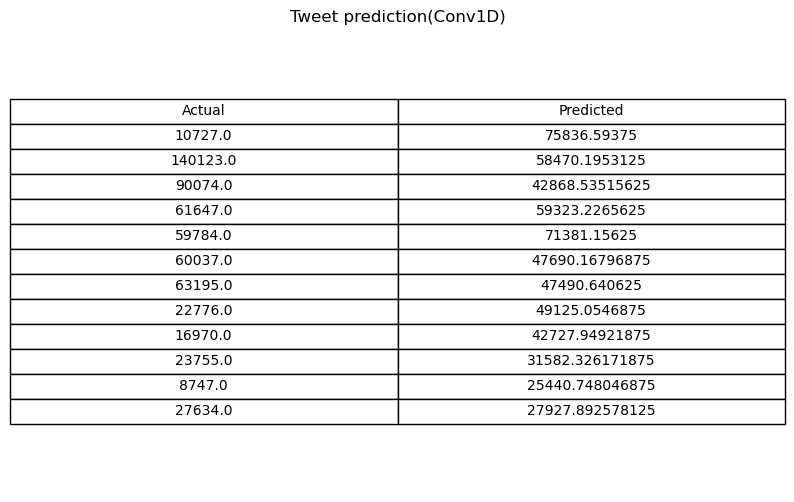

In [11]:
# Reverse normalization of real values (Actual)
actual_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)


# Create DataFrame with back normalized forecasts and real values
forecast_table_conv1d = pd.DataFrame({'Actual': actual_unscaled, 'Predicted': y_pred_conv1d.reshape(-1)})
forecast_table_conv1d.index = test.index[sequence_length:]

# Display information panel for prediction
fig, ax = plt.subplots(figsize=(10, 6))

# Table construction
ax.axis('off')
table_conv1d = ax.table(cellText=forecast_table_conv1d.values, colLabels=forecast_table_conv1d.columns, cellLoc='center', loc='center')
table_conv1d.auto_set_font_size(False)
table_conv1d.set_fontsize(10)
table_conv1d.scale(1, 1.5)

# Table header display
ax.set_title('Tweet prediction(Conv1D)')

